<a href="https://colab.research.google.com/github/Samuel-Wamwitha/KNN-and-Naive-Bayes-Classification/blob/master/Samuel_Wamwitha_Core_KNN_IP_Week_9_12_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Week 9 - KNN Classification

## 1. Defining the Question

### a) Specifying the Question

Perform classification of whether a person survived or not survived using the KNN Classifier

### b) Defining the metrics for success

The metric for success is to create a model using KNN classification that will be able to classify whether a person survived or not survived with an accuracy of above 0.75.

### c) Understanding the context

Titanic ship was one of the biggest ship build in the 20th Century. It started its journey from Southamptom, England for Newyork, USA. 

Titanic had on board many passengers comprising of the wealthy, dignitaries, celebrities and common people. Unfortunately the ship did not reach its destination because it hit an iceberg on the Atlantic ocean and sank. Only a few people survived the tragedy.

### d) Recording the Experimental Design

The following steps will be undertaken:

- Loading Dataset
- Clean the Dataset
- Perform EDA analysis
- Perform KNN Classification
- Challenge the solution

### e) Data Revalence

The objective of our analysis is to create a model that classifies text as spam or not spam. Given that objective the data was relavant to achieve that.

## 2. Reading the Data

In [230]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Columns Description

- Survived - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare (British pound)
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [231]:
# Loading the train dataset
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
# Loading test dataset
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [233]:
# Checking the unique value of Survived column
train.Survived.unique()

array([0, 1])

## 3. Checking the Data

In [234]:
# Determining the number of records in train dataset
train.shape

(891, 12)

In [235]:
# Determining the number of records in test dataset
test.shape

(418, 11)

In [236]:
# Previewing the top of the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
# Previewing the top of the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [238]:
# Previewing the bottom of our train dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [239]:
# Previewing the bottom of our train dataset
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [240]:
# Checking whether each column has an appropriate datatype in train dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [241]:
# Checking whether each column has an appropriate datatype in test dataset
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [242]:
# Checking for duplicates in train dataset
train.duplicated().sum()

0

In [243]:
# Checking for duplicates in test dataset
test.duplicated().sum()

0

In [244]:
# Checking the columns in the dataset 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [245]:
# Dropping irrelevant columns in train dataset
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [246]:
# Dropping irrelevant columns in test dataset
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

## 4. Tidying the Dataset

Checking for outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


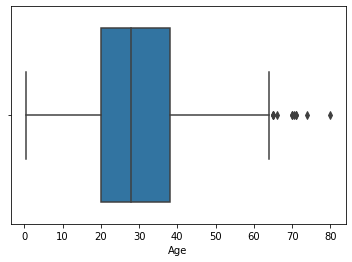

In [247]:
sns.boxplot(train.Age)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


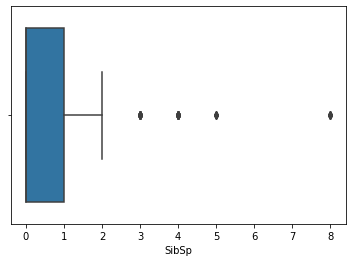

In [248]:
sns.boxplot(train.SibSp)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


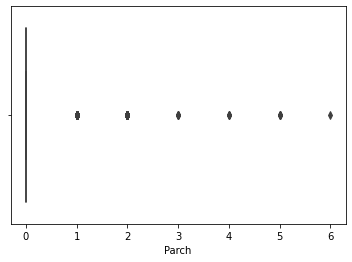

In [249]:
sns.boxplot(train.Parch)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


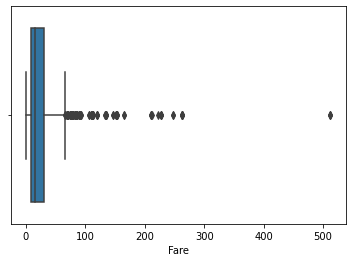

In [250]:
sns.boxplot(train.Fare)

Checking for missing values

In [251]:
# Checking for missing values in train dataset
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [252]:
# Checking for missing values in test datasset
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

Dealing with missing values

In [253]:
# Getting the mean of Age in train dataset
train.Age.mean()

29.69911764705882

In [254]:
# Replacing null values in Age column with mean of ages
train.Age.fillna(train['Age'].mean(), inplace=True)

In [255]:
# Getting the mean of Age in test dataset
test['Age'].mean()

30.272590361445783

In [256]:
# Replacing null values in Age column with mean of ages
test.Age.fillna(train['Age'].mean(), inplace=True)

In [257]:
# Dropping the rest of the null values
train.dropna(inplace=True)

In [258]:
# Dropping the rest of the null values
test.dropna(inplace=True)

In [259]:
# Changing data types of various columns
train = train.astype({'Age': 'int64'})

## 5. Exploratory Data Analysis

### Univariate Analysis

#### Plots

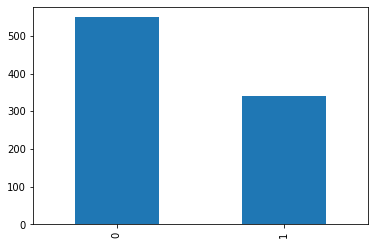

In [260]:
# Plotting value counts of Survived
train['Survived'].value_counts().plot(kind='bar')

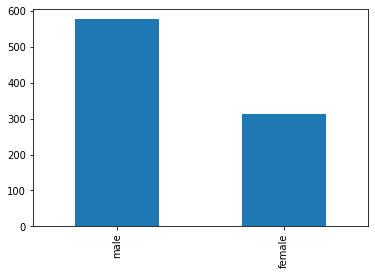

In [261]:
# Plotting value counts of Sex
train['Sex'].value_counts().plot(kind='bar')

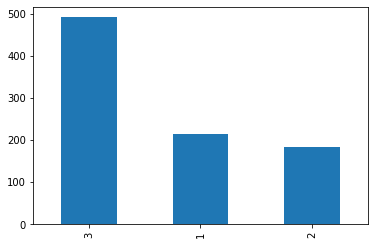

In [262]:
# Plotting value counts of Pclass
train['Pclass'].value_counts().plot(kind='bar')

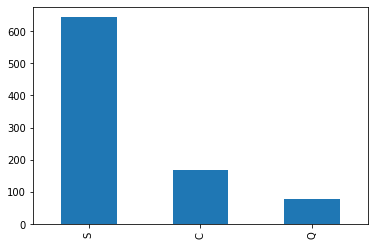

In [263]:
# Plotting value counts of Embarked
train['Embarked'].value_counts().plot(kind='bar')

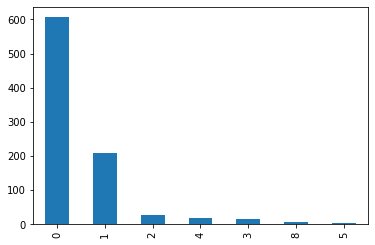

In [264]:
# Plotting value counts of SibSp
train['SibSp'].value_counts().plot(kind='bar')

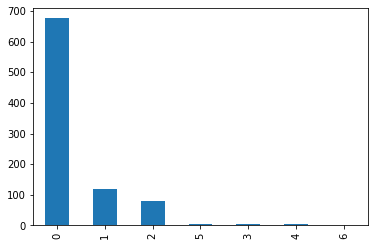

In [265]:
# Plotting value counts of Parch
train['Parch'].value_counts().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


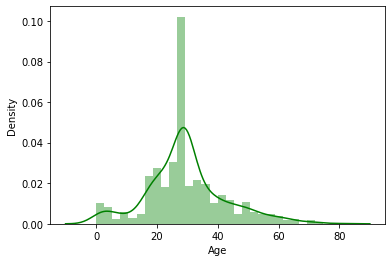

In [266]:
# Plotting the Distplot of age
sns.distplot(train.Age, color="g")

####Central Tendency & Dispersion

Age

In [267]:
# Getting the mean of age
train.Age.mean()

29.498312710911136

In [268]:
# Getting the maximum age
train.Age.max()

80

In [269]:
# Getting the minimum age
train.Age.min()

0

Fare

In [270]:
# Getting the mean of fare
train.Fare.mean()

32.09668087739029

In [271]:
# Getting the maximum fare paid
train.Fare.max()

512.3292

In [272]:
# Getting the minimum fare paid
train.Fare.min()

0.0

Observations

From the analysis the following observations were made:

- Most people did not survive
- Most people were males
- Most people embarked at Port of Southampton
- Most people were in Passenger class 3 
- Most people did not have parents or children with them in the Titanic
- Most patients did not have a sibling or spouse with them in the Titanic
- Most people in the Titanic were aged between 20-40 years

### Bivariate Analysis

In [273]:
# Label Encoding Sex and Embarked columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])

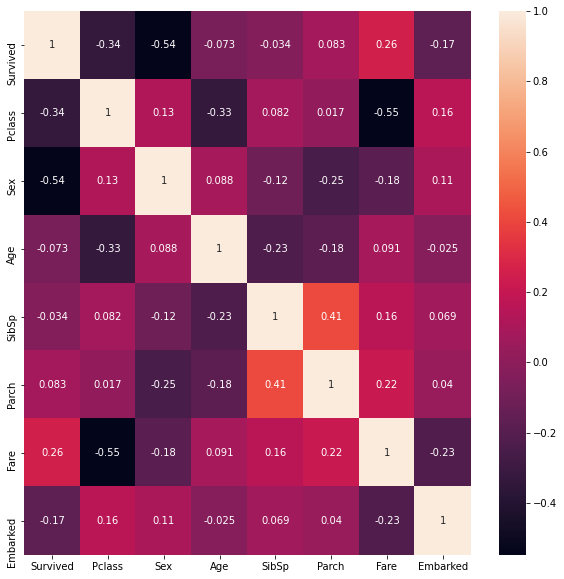

In [274]:
plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

Observations

- SibSp and Parch have the highest correlation of 0.41. This means these independent variables are highly correlated of each other.

- Pclass and Fare have the lowest correlation of -0.55. This means these independent variables are lowly correlated of each other.

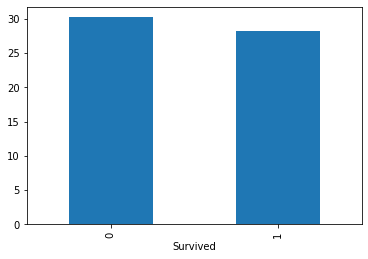

In [275]:
# Plotting Survived against Mean of Age
age = train.groupby(['Survived'])['Age'].mean()
age.plot.bar()

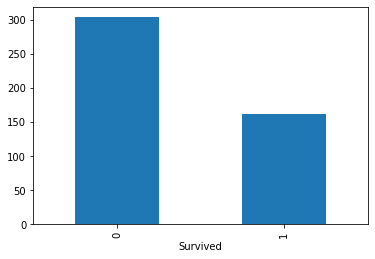

In [276]:
# Plotting Survived against Count of SibSp
sib = train.groupby(['Survived'])['SibSp'].sum()
sib.plot.bar()

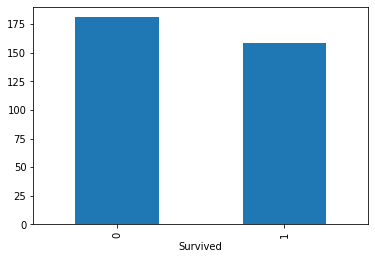

In [277]:
# Plotting Survived against Count of Parch
parch = train.groupby(['Survived'])['Parch'].sum()
parch.plot.bar()

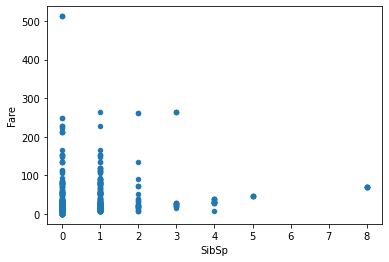

In [278]:
# Creating a scatter plot between SibSp and Fare
train.plot.scatter(x='SibSp', y='Fare')

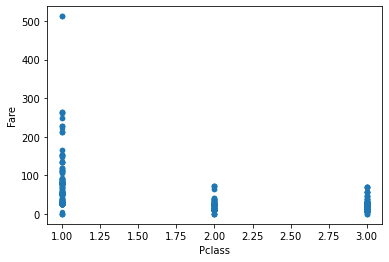

In [279]:
# Creating a scatter plot between Pclass and Fare
train.plot.scatter(x='Pclass', y='Fare')

Observations

- People who did not survive have the highest age mean compared to those who survived
- People who did not survive have the highest number of siblings/spouse on board with them compared to those who survived.
- People who did not survive have the highest number of parent/children on board with them compared to those who survived.

## 6. Implementing the Solution

### KNN Classifier

In [280]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [281]:
# Defining the feature variables and target variable in our dataset.
X = train.iloc[:, 1:8].values
y = train.iloc[:, 0].values

Optimized Model, 80-20

In [282]:
# Performing Normalization with Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [283]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [284]:
# Data Reduction using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [285]:
# Using GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,20))
n_neighbors = list(range(1, 15))
p = [1, 2, 3]

classifier = KNeighborsClassifier()
parameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p)

clf = GridSearchCV(classifier, parameters, cv=5)
clf.fit(X_train,y_train)

# Finding best param
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 8, 'p': 1}

In [286]:
# Making predictions from our model
y_pred = clf.predict(X_test)

In [287]:
# Checking the correlation matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[91 14]
 [33 40]]


0.7359550561797753

Optimized Model, 70-30

In [288]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [289]:
# Data Reduction using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [290]:
# Using GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,20))
n_neighbors = list(range(1, 15))
p = [1, 2, 3]

classifier = KNeighborsClassifier()
parameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p)

clf = GridSearchCV(classifier, parameters, cv=5)
clf.fit(X_train,y_train)

# Finding best param
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 10, 'p': 1}

In [291]:
# Making predictions from our model
y_pred = clf.predict(X_test)

In [292]:
# Checking the correlation matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[138  19]
 [ 40  70]]


0.7790262172284644

Optimized Model, 60-40

In [293]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [294]:
# Using GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,20))
n_neighbors = list(range(1, 15))
p = [1, 2, 3]

classifier = KNeighborsClassifier()
parameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p)

clf = GridSearchCV(classifier, parameters, cv=5)
clf.fit(X_train,y_train)

# Finding best param
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 6, 'p': 1}

In [295]:
# Making predictions from our model
y_pred = clf.predict(X_test)

In [296]:
# Checking the correlation matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[198  18]
 [ 55  85]]


0.7949438202247191

Observations

Three models were built all with optimization. Optimization techniques used were Standard scaling and Data reduction using LDA.

The optimized models all had an accuracy of above 70%. But the accuracy of the models increased as we increased the size of out test set. The 80-20 model had an  accuracy of 73.59%, 70-30 model has an accuracy of 77.90%, and 60-40 model has an accuracy of 79.49%.

## 7. Challenging the Solution

In [297]:
# Defining the feature variables and target variable in our dataset.
X = train.iloc[:, 1:8].values
y = train.iloc[:, 0].values

In [298]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [299]:
# Fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predicting fromour model
y_pred = classifier.predict(X_test)

In [300]:
# Checking the correlation matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[80 25]
 [30 43]]


0.6910112359550562

The solution was challenged by performing a KNN classification without optimization and k = 5

It turned out to have an accuracy of 69.10%. This shows that optimization increases the performance of the model.

## 8. Follow up Questions

a) Did we have the right data?

The data was right as it helped build the required model.

b) Do we need other data to answer our question?

The data was enough to enable a model to be build from it.

c) Did we have the right question?

The question was right according to the dataset being investigated.